In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import plotly.graph_objs as go
import matplotlib.pyplot as plt

In [2]:
# Loading the dataset
df = pd.read_csv('/content/yield_curve.csv')
df.head(15)

,x,y,z[0],z[1],z[2],z[3],z[4],z[5],z[6],z[7],z[8],z[9],z[10]
0,1-month,1990-01-02,NaN,7.83,7.89,7.81,7.87,7.90,7.87,7.98,7.94,NaN,8.00
1,3-month,1990-01-03,NaN,7.89,7.94,7.85,7.94,7.96,7.92,8.04,7.99,NaN,8.04
2,6-month,1990-01-04,NaN,7.84,7.90,7.82,7.92,7.93,7.91,8.02,7.98,NaN,8.04
3,1-year,1990-01-05,NaN,7.79,7.85,7.79,7.90,7.94,7.92,8.03,7.99,NaN,8.06
4,2-year,1990-01-08,NaN,7.79,7.88,7.81,7.90,7.95,7.92,8.05,8.02,NaN,8.09
5,3-year,1990-01-09,NaN,7.80,7.82,7.78,7.91,7.94,7.92,8.05,8.02,NaN,8.10
6,5-year,1990-01-10,NaN,7.75,7.78,7.77,7.91,7.95,7.92,8.00,8.03,NaN,8.11
7,7-year,1990-01-11,NaN,7.80,7.80,7.77,7.91,7.95,7.94,8.01,8.04,NaN,8.11
8,10-year,1990-01-12,NaN,7.74,7.81,7.76,7.93,7.98,7.99,8.07,8.10,NaN,8.17
9,20-year,1990-01-16,NaN,7.89,7.99,7.92,8.10,8.13,8.11,8.18,8.20,NaN,8.25


In [3]:
# Checking for null values
df.isnull().sum()

,0
x,6296
y,0
z[0],2899
z[1],3
z[2],0
z[3],0
z[4],0
z[5],0
z[6],0
z[7],0


In [4]:
# Dropping Null Values
xlist = list(df["x"].dropna())
ylist = list(df["y"].dropna())

In [5]:
# Dropping Column X since it is irrelavent
del df["x"]

In [6]:
# Creating a list of lists (zlist) from the DataFrame (df),
zlist = []
for row in df.iterrows():
    index, data = row
    zlist.append(data.tolist())

In [7]:
# Google Colab config to enable custom widget plots
from google.colab import output
output.enable_custom_widget_manager()

In [8]:
# Create z_secondary from values
z_secondary_beginning = [z[1] for z in zlist if z[0] == "None"]
z_secondary_end = [z[0] for z in zlist if z[0] != "None"]
z_secondary = z_secondary_beginning + z_secondary_end
x_secondary = ["3-month"] * len(z_secondary_beginning) + ["1-month"] * len(
    z_secondary_end
)
y_secondary = ylist

In [9]:
# Generating the traces
trace1 = go.Surface(
    x=xlist,
    y=ylist,
    z=zlist,
    hoverinfo="x+y+z",
    lighting=dict(
        ambient=0.95,
        diffuse=0.99,
        fresnel=0.01,
        roughness=0.01,
        specular=0.01,
    ),
    colorscale=[
        [0, "rgb(230,245,254)"],
        [0.4, "rgb(123,171,203)"],
        [0.8, "rgb(40,119,174)"],
        [1, "rgb(37,61,81)"],
    ],
    opacity=0.7,
    showscale=False,
)

trace2 = go.Scatter3d(
    mode="lines",
    x=x_secondary,
    y=y_secondary,
    z=z_secondary,
    hoverinfo="x+y+z",
    line=dict(color="#444444"),
)

In [10]:
# Defining the layout of the plot
layout = go.Layout(
    autosize=True,
    font=dict(size=12, color="#CCCCCC"),
    margin=dict(t=5, l=5, b=5, r=5),
    showlegend=False,
    hovermode="closest",
    scene=dict(
        aspectmode="manual",
        aspectratio=dict(x=2, y=5, z=1.5),
        xaxis=dict(
            showgrid=True,
            title="",
            type="category",
            zeroline=False,
            categoryorder="array",
            categoryarray=list(reversed(xlist)),
        ),
        yaxis=dict(showgrid=True, title="", type="date", zeroline=False),
    ),
)

In [11]:
# Creating the figure
figure = go.FigureWidget(data=[trace1, trace2], layout=layout)
figure.show()

In [12]:
# Defining the new column names for ease
new_column_names = {
    'z[0]': '1-month',
    'z[1]': '3-month',
    'z[2]': '6-month',
    'z[3]': '1-year',
    'z[4]': '2-year',
    'z[5]': '3-year',
    'z[6]': '5-year',
    'z[7]': '7-year',
    'z[8]': '10-year',
    'z[9]': '20-year',
    'z[10]': '30-year'
}

# Renaming the columns in the DataFrame
df.rename(columns=new_column_names, inplace=True)

df.head()

,y,1-month,3-month,6-month,1-year,2-year,3-year,5-year,7-year,10-year,20-year,30-year
0,1990-01-02,NaN,7.83,7.89,7.81,7.87,7.90,7.87,7.98,7.94,NaN,8.00
1,1990-01-03,NaN,7.89,7.94,7.85,7.94,7.96,7.92,8.04,7.99,NaN,8.04
2,1990-01-04,NaN,7.84,7.90,7.82,7.92,7.93,7.91,8.02,7.98,NaN,8.04
3,1990-01-05,NaN,7.79,7.85,7.79,7.90,7.94,7.92,8.03,7.99,NaN,8.06
4,1990-01-08,NaN,7.79,7.88,7.81,7.90,7.95,7.92,8.05,8.02,NaN,8.09


In [13]:
from scipy.optimize import curve_fit

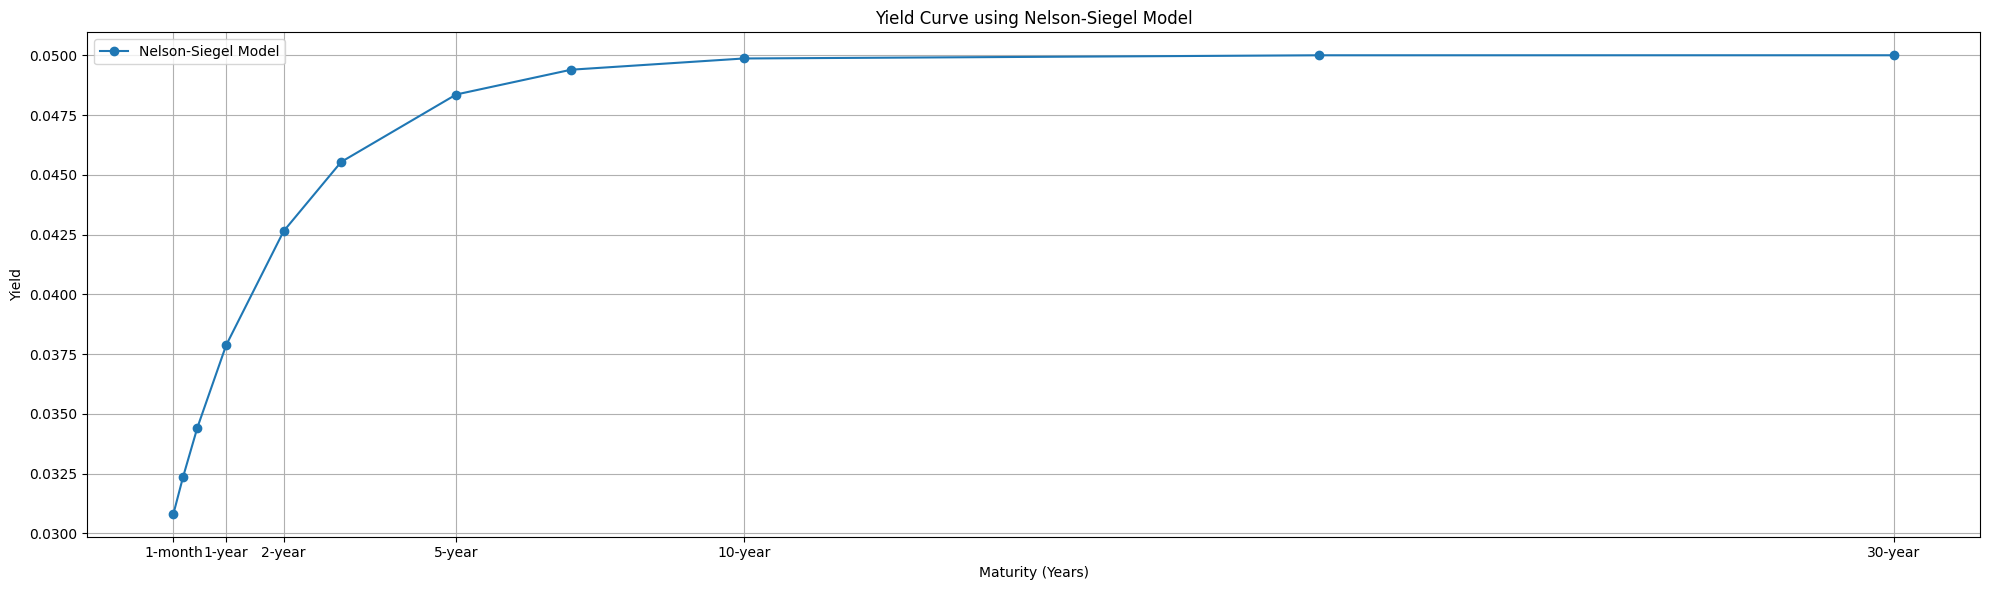

In [14]:
# Function to calculate the Nelson-Siegel yield curve
def nelson_siegel(tau, beta0, beta1, beta2, tau1):
    return beta0 + beta1 * (1 - np.exp(-tau / tau1)) / (tau / tau1) + beta2 * ((1 - np.exp(-tau / tau1)) / (tau / tau1) - np.exp(-tau / tau1))

# Defining parameters for the Nelson-Siegel model
beta0 = 0.05  # Level
beta1 = -0.02  # Slope
beta2 = 0.02   # Curvature
tau1 = 2       # Decay factor

# Generating tau values (maturity) corresponding to your yield curve
tau = np.array([1/12, 3/12, 6/12, 1, 2, 3, 5, 7, 10, 20, 30])

# Calculating yields using the Nelson-Siegel formula
yield_curve_nelson_siegel = nelson_siegel(tau, beta0, beta1, beta2, tau1)

# Plotting the yield curve
plt.figure(figsize=(20, 6))  # Increase the figure width
plt.plot(tau, yield_curve_nelson_siegel, label='Nelson-Siegel Model', marker='o')
plt.title('Yield Curve using Nelson-Siegel Model')
plt.xlabel('Maturity (Years)')
plt.ylabel('Yield')

# Setting xticks with a subset of labels for clarity
key_maturities = [1/12, 1, 2, 5, 10, 30]  # Choose key maturities to display
key_labels = ['1-month', '1-year', '2-year', '5-year', '10-year', '30-year']
plt.xticks(key_maturities, key_labels)

plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

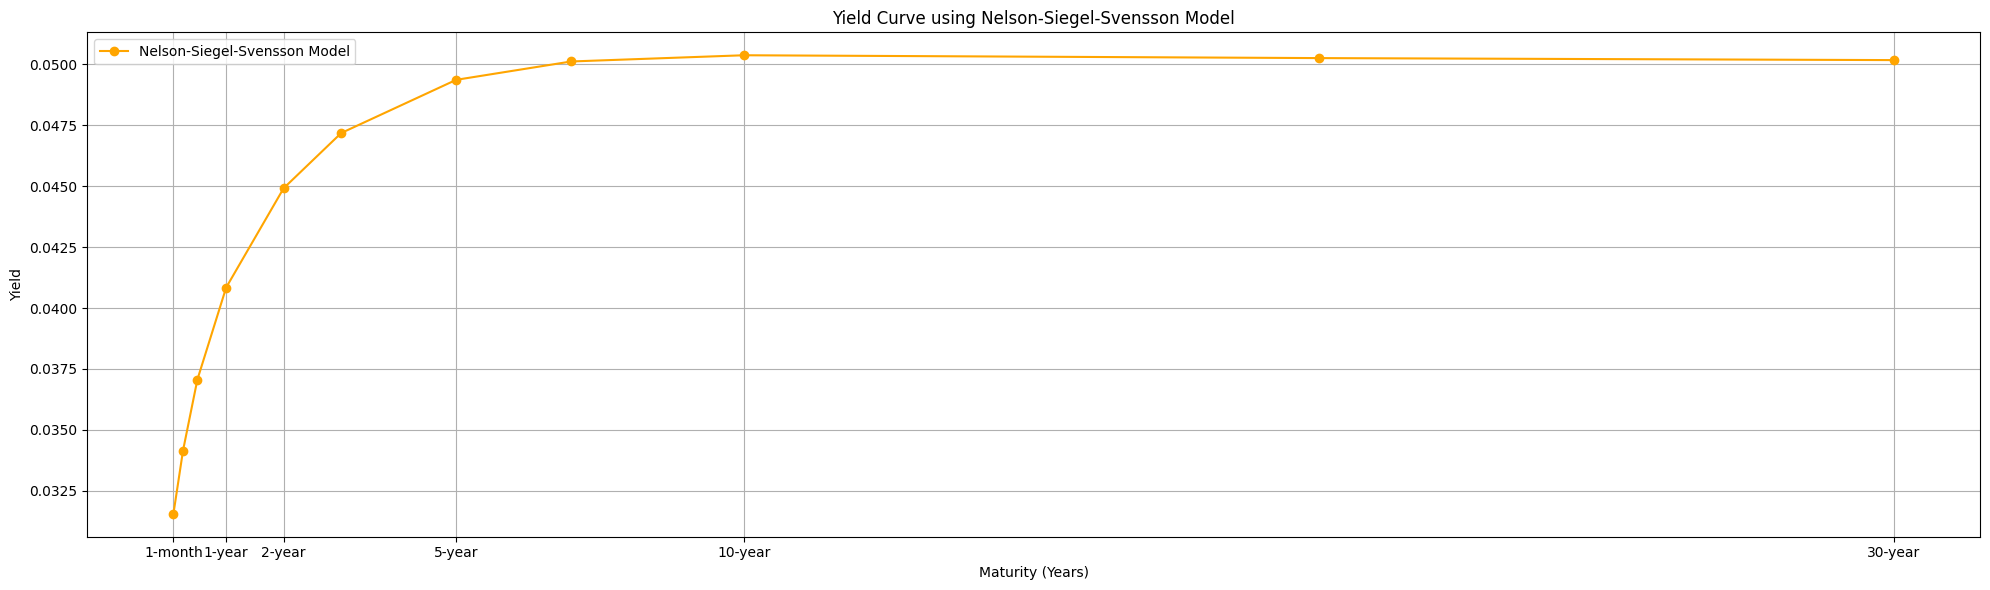

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate the Nelson-Siegel-Svensson yield curve
def nelson_siegel_svensson(tau, beta0, beta1, beta2, beta3, tau1, tau2):
    term1 = (1 - np.exp(-tau / tau1)) / (tau / tau1)
    term2 = term1 - np.exp(-tau / tau1)
    term3 = (1 - np.exp(-tau / tau2)) / (tau / tau2)
    term4 = term3 - np.exp(-tau / tau2)

    return beta0 + beta1 * term1 + beta2 * term2 + beta3 * term4

# Defining parameters for the Nelson-Siegel-Svensson model
beta0 = 0.05  # Level
beta1 = -0.02  # Slope
beta2 = 0.02   # Curvature
beta3 = 0.01   # Additional curvature
tau1 = 2       # First decay factor
tau2 = 0.5     # Second decay factor

# Generating tau values (maturity) corresponding to your yield curve
tau = np.array([1/12, 3/12, 6/12, 1, 2, 3, 5, 7, 10, 20, 30])

# Calculating yields using the Nelson-Siegel-Svensson formula
yield_curve_nelson_siegel_svensson = nelson_siegel_svensson(tau, beta0, beta1, beta2, beta3, tau1, tau2)

# Plotting the yield curve
plt.figure(figsize=(20, 6))  # Adjusted figure size for better spacing
plt.plot(tau, yield_curve_nelson_siegel_svensson, label='Nelson-Siegel-Svensson Model', marker='o', color='orange')
plt.title('Yield Curve using Nelson-Siegel-Svensson Model')
plt.xlabel('Maturity (Years)')
plt.ylabel('Yield')

# Setting xticks with a subset of labels for clarity
key_maturities = [1/12, 1, 2, 5, 10, 30]  # Choose key maturities to display
key_labels = ['1-month', '1-year', '2-year', '5-year', '10-year', '30-year']
plt.xticks(key_maturities, key_labels)

plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

In [16]:
# Ensuring the 'y' column is in datetime format if it's not already
df['y'] = pd.to_datetime(df['y'])  # Convert 'y' to datetime
df.set_index('y', inplace=True)  # Set 'y' as the index

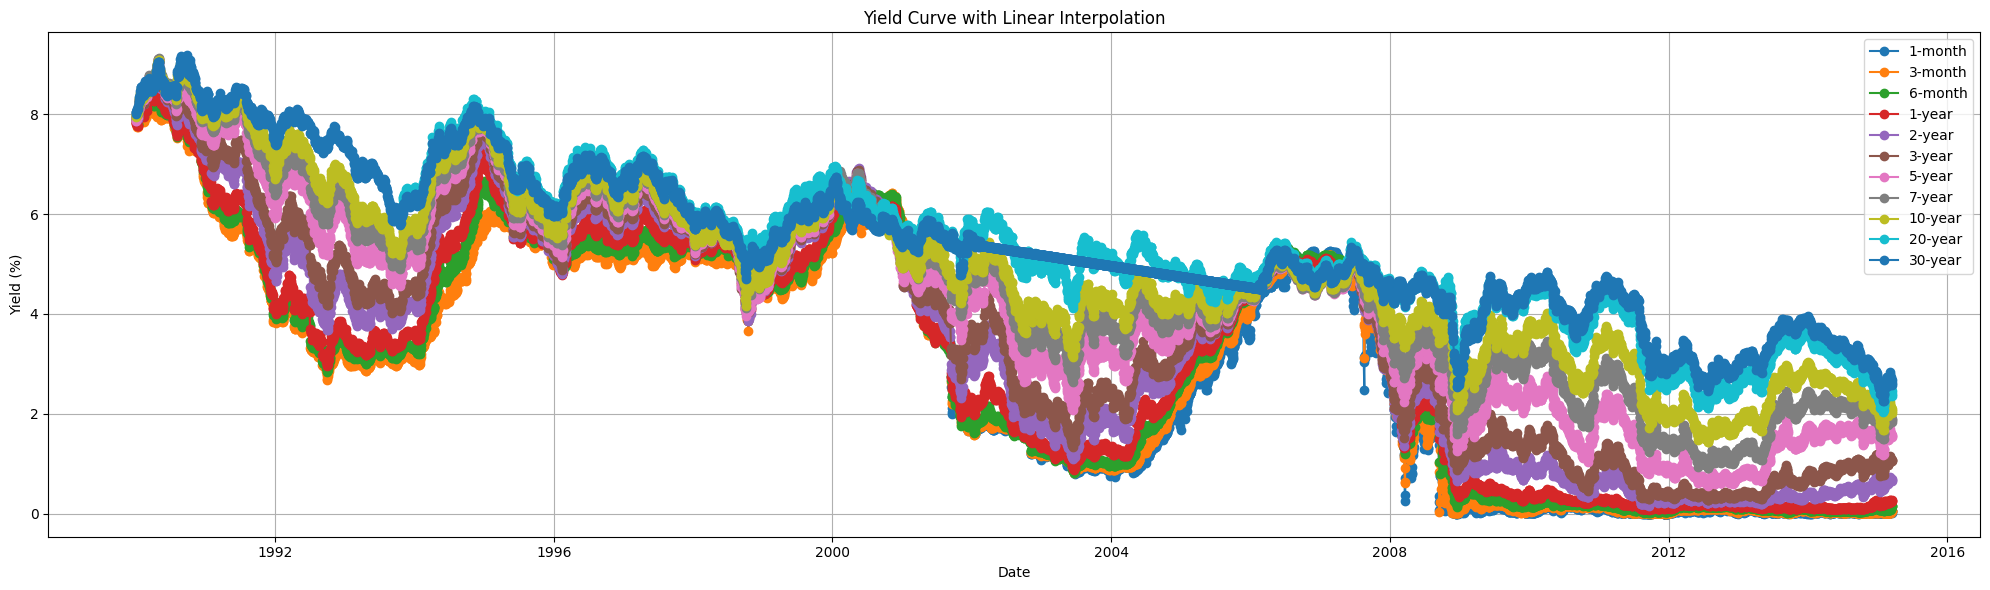

In [17]:
# Interpolating the missing values in the DataFrame
df_interpolated = df.interpolate(method='linear')

# Plotting the yield curve
plt.figure(figsize=(20, 6))

# Plotting each maturity with interpolated values
plt.plot(df_interpolated.index, df_interpolated['1-month'], label='1-month', marker='o')
plt.plot(df_interpolated.index, df_interpolated['3-month'], label='3-month', marker='o')
plt.plot(df_interpolated.index, df_interpolated['6-month'], label='6-month', marker='o')
plt.plot(df_interpolated.index, df_interpolated['1-year'], label='1-year', marker='o')
plt.plot(df_interpolated.index, df_interpolated['2-year'], label='2-year', marker='o')
plt.plot(df_interpolated.index, df_interpolated['3-year'], label='3-year', marker='o')
plt.plot(df_interpolated.index, df_interpolated['5-year'], label='5-year', marker='o')
plt.plot(df_interpolated.index, df_interpolated['7-year'], label='7-year', marker='o')
plt.plot(df_interpolated.index, df_interpolated['10-year'], label='10-year', marker='o')
plt.plot(df_interpolated.index, df_interpolated['20-year'], label='20-year', marker='o')
plt.plot(df_interpolated.index, df_interpolated['30-year'], label='30-year', marker='o')

# Adding titles and labels
plt.title('Yield Curve with Linear Interpolation')
plt.xlabel('Date')
plt.ylabel('Yield (%)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [18]:
# Dropping rows with any NaN values
df_cleaned = df.dropna()

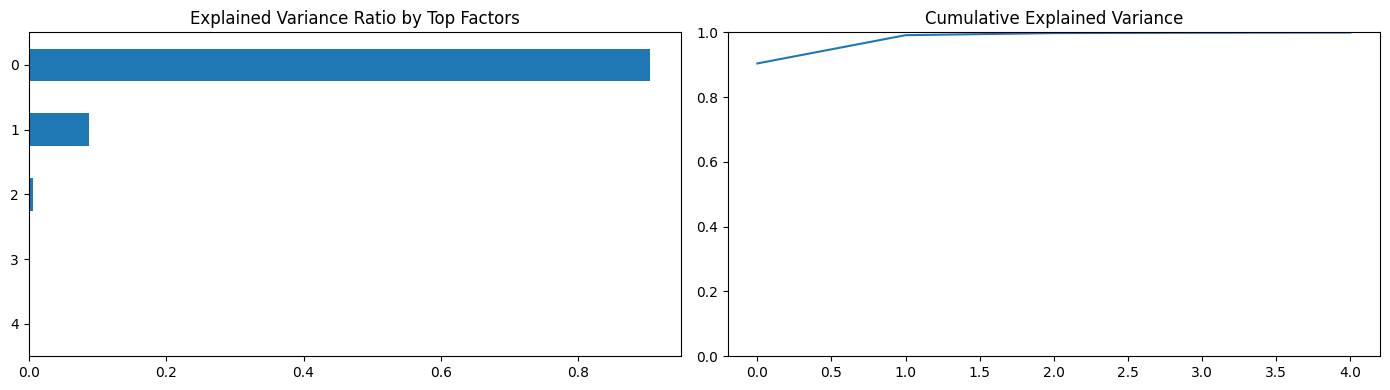

,Explained Variance_Top 5
0,90.39%
1,99.12%
2,99.76%
3,99.89%
4,99.94%


In [19]:
from sklearn.decomposition import PCA

# Assuming df_interpolated contains your yield data, excluding the 'y' column
X = df_cleaned[['1-month', '3-month', '6-month', '1-year', '2-year',
                      '3-year', '5-year', '7-year', '10-year', '20-year', '30-year']]

# Standardizing the data
X_standardized = (X - X.mean()) / X.std()

# Performing PCA
pca = PCA()
pca.fit(X_standardized)

# Number of principal components to display
NumEigenvalues = 5

# Creating subplots
fig, axes = plt.subplots(ncols=2, figsize=(14, 4))

# Bar plot for explained variance ratio by top factors
pd.Series(pca.explained_variance_ratio_[:NumEigenvalues]).sort_values().plot.barh(
    title='Explained Variance Ratio by Top Factors', ax=axes[0]
)

# Cumulative explained variance plot
pd.Series(pca.explained_variance_ratio_[:NumEigenvalues]).cumsum().plot(
    ylim=(0, 1), ax=axes[1], title='Cumulative Explained Variance'
)

# Showing the plots
plt.tight_layout()
plt.show()

# Explained variance as a DataFrame
explained_variance_df = pd.Series(np.cumsum(pca.explained_variance_ratio_)).to_frame('Explained Variance_Top 5').head(NumEigenvalues)

# Formatting the DataFrame for better visualization
explained_variance_df.style.format('{:,.2%}'.format)

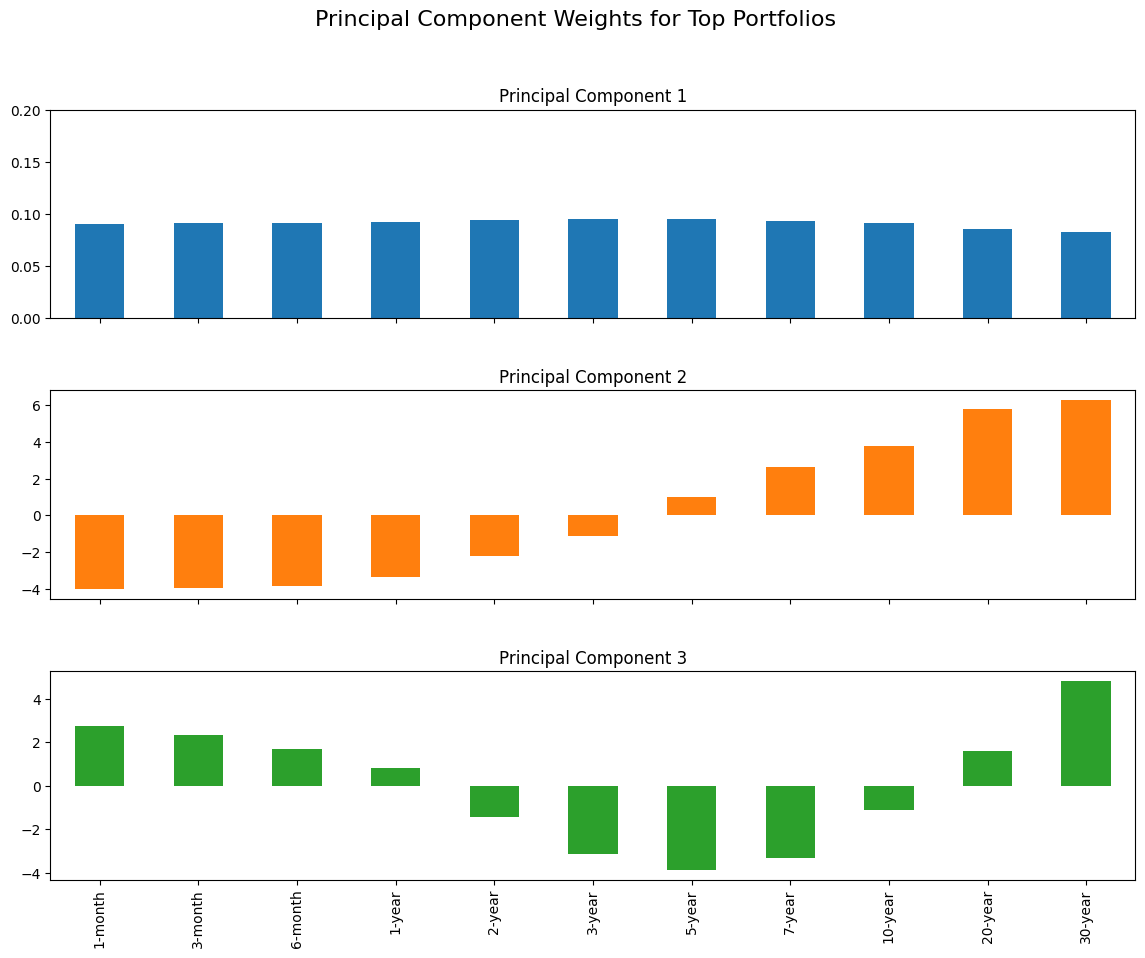

In [20]:
def PCWeights():
    '''
    Principal Components (PC) weights for each PC
    '''
    weights = pd.DataFrame()

    for i in range(len(pca.components_)):
        weights["weights_{}".format(i)] = pca.components_[i] / sum(pca.components_[i])

    return weights.values.T

weights = PCWeights()

NumComponents = 3
topPortfolios = pd.DataFrame(weights[:NumComponents], columns=X.columns)
topPortfolios.index = [f'Principal Component {i}' for i in range(1, NumComponents + 1)]

# Plotting the weights of the top principal components
axes = topPortfolios.T.plot.bar(subplots=True, legend=False, figsize=(14, 10))
plt.subplots_adjust(hspace=0.35)
axes[0].set_ylim(0, .2)
plt.suptitle('Principal Component Weights for Top Portfolios', fontsize=16)
plt.show()

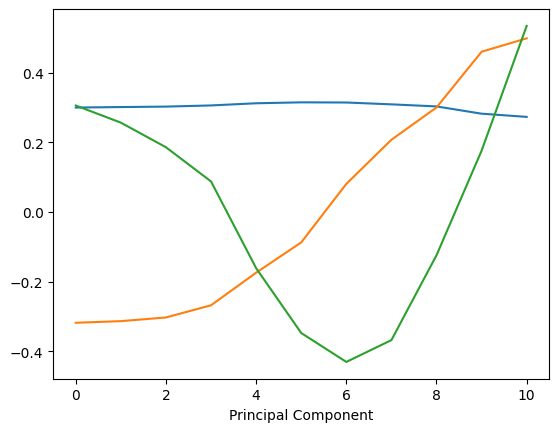

In [21]:
plt.plot(pca.components_[0:3].T)
plt.xlabel("Principal Component")
plt.show()

In [22]:
# Transforming the dataset
transformed_data = pca.transform(X_standardized)[:, :2]  # Getting the first 2 principal components

# Reconstructing the original data
reconstructed_data = pca.inverse_transform(transformed_data)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 11 is different from 2)

In [23]:
pca.transform(X_standardized)[:,:2]

array([[ 4.80121931,  0.85944272],
       [ 4.86008314,  0.89703474],
       [ 4.96583041,  0.96762298],
       ...,
       [-2.77914553, -1.16336686],
       [-2.8191131 , -1.25253584],
       [-2.87067615, -1.30726438]])

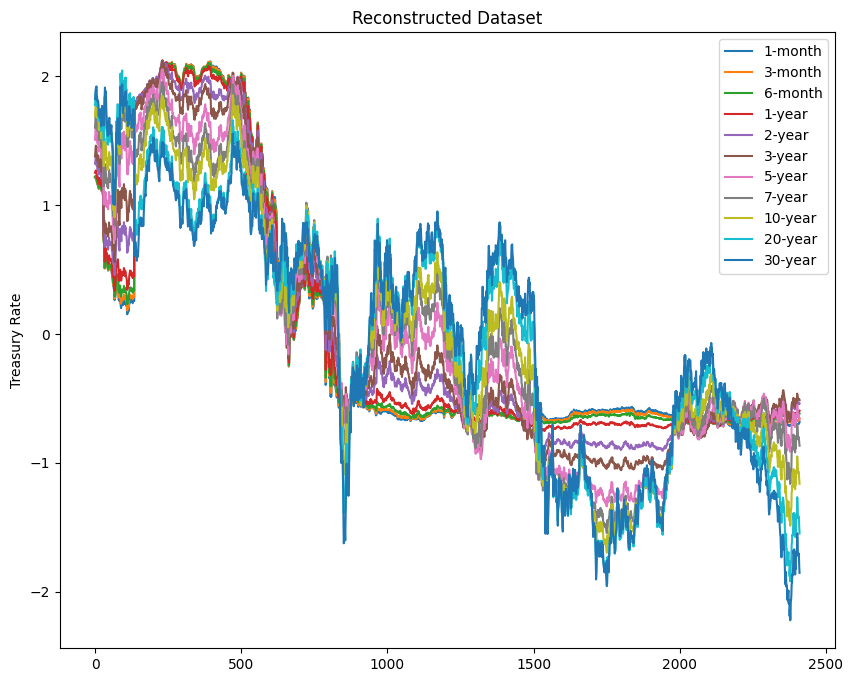

In [24]:
# Number of components to use for reconstruction
nComp = 3

# Reconstructing the data
reconst = pd.DataFrame(np.dot(pca.transform(X_standardized)[:, :nComp], pca.components_[:nComp, :]),
                       columns=X.columns)

# Plotting the reconstructed dataset
plt.figure(figsize=(10, 8))
plt.plot(reconst)
plt.ylabel("Treasury Rate")
plt.title("Reconstructed Dataset")
plt.legend(reconst.columns)  # Add legend for clarity
plt.show()
